### 讀入基本套件###

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

### 進行訓練資料預處理 ###

In [2]:
train = pd.read_csv(r'C:\Users\user\Desktop\data\sales_train.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\data\test.csv')
item = pd.read_csv(r'C:\Users\user\Desktop\data\items.csv')

In [3]:
train['date']=pd.to_datetime(train['date'], format= "%d.%m.%Y")

In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [5]:
train.shape

(2935849, 6)

In [6]:
train.isnull().sum() #看是否有缺失直

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [7]:
train.sort_values(['date'], inplace = True)

In [8]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2885098,2015-10-31,33,41,21386,169.0,1.0
2930981,2015-10-31,33,21,988,199.0,1.0
2885097,2015-10-31,33,41,21377,169.0,1.0
2930993,2015-10-31,33,22,10207,1199.0,1.0
2928850,2015-10-31,33,24,3042,3199.0,1.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 49800 to 2928850
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 156.8 MB


In [10]:
train.describe(include = 'all')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
unique,1034,NaN,NaN,NaN,NaN,NaN
top,2013-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,9434,NaN,NaN,NaN,NaN,NaN
first,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2015-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,NaN,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,NaN,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00


In [11]:
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [12]:
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year #將月份以及年份加入資料

In [13]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year
2885098,2015-10-31,33,41,21386,169.0,1.0,10,2015
2930981,2015-10-31,33,21,988,199.0,1.0,10,2015
2885097,2015-10-31,33,41,21377,169.0,1.0,10,2015
2930993,2015-10-31,33,22,10207,1199.0,1.0,10,2015
2928850,2015-10-31,33,24,3042,3199.0,1.0,10,2015


In [14]:
train_2 = pd.merge(train,item.iloc[:,1:3],on = 'item_id') #將種類併入資料

In [15]:
train_2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_category_id
0,2013-01-01,0,18,5823,2500.0,1.0,1,2013,35
1,2013-01-01,0,54,5823,2499.5,1.0,1,2013,35
2,2013-01-02,0,54,5823,2500.0,1.0,1,2013,35
3,2013-01-02,0,42,5823,2490.0,1.0,1,2013,35
4,2013-01-02,0,56,5823,2500.0,1.0,1,2013,35


In [16]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   date_block_num    int64         
 2   shop_id           int64         
 3   item_id           int64         
 4   item_price        float64       
 5   item_cnt_day      float64       
 6   month             int64         
 7   year              int64         
 8   item_category_id  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 224.0 MB


In [17]:
train_2.isnull().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
month               0
year                0
item_category_id    0
dtype: int64

In [18]:
train_3 = train_2.groupby(['date_block_num', 'shop_id', 'item_id', 'month', 'year'])['item_cnt_day'].sum() #要預測各個商店各個商品每月銷售量，分開加總

In [19]:
train_3 = train_3.to_frame()
train_3.reset_index(inplace = True)

In [20]:
money = train_2.groupby(['date_block_num', 'shop_id', 'item_id', 'month'])['item_price'].mean() # 因為是每個月所以將價格取為在那個月中的平均

In [21]:
money = money.to_frame()
money.reset_index(inplace = True)

In [22]:
train_3 = pd.concat([train_3, money['item_price']],axis = 1)

In [23]:
train_3.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_day,item_price
0,0,0,32,1,2013,6.0,221.0
1,0,0,33,1,2013,3.0,347.0
2,0,0,35,1,2013,1.0,247.0
3,0,0,43,1,2013,1.0,221.0
4,0,0,51,1,2013,2.0,128.5


In [24]:
train_4 = pd.merge(train_3,item.iloc[:,1:3], on = 'item_id' )
train_4 = train_4.rename(columns= {'item_cnt_day':'item_cnt_month'})

In [25]:
train_4.loc[train_4['year'] == 2013,'year'] =0
train_4.loc[train_4['year'] == 2014,'year'] =1
train_4.loc[train_4['year'] == 2015,'year'] =2 #因為要進行one hot encoding，所以將年份手動進行label encoding

In [26]:
train_4.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_price,item_category_id
0,0,0,32,1,0,6.0,221.0,40
1,0,1,32,1,0,7.0,221.0,40
2,0,3,32,1,0,3.0,349.0,40
3,0,4,32,1,0,2.0,349.0,40
4,0,6,32,1,0,8.0,349.0,40


### 進行模型建構 ###

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
std = StandardScaler()

In [29]:
train_4['item_cnt_month'] = std.fit_transform(train_4['item_cnt_month'].values.reshape(-1,1))
train_4['item_price'] = std.fit_transform(train_4['item_price'].values.reshape(-1,1))
train_4['item_id'] = std.fit_transform(train_4['item_id'].values.reshape(-1,1)) #對數值資料進行標準化

In [30]:
train_4.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_price,item_category_id
0,0,0,-1.706875,1,0,0.431544,-0.367287,40
1,0,1,-1.706875,1,0,0.547152,-0.367287,40
2,0,3,-1.706875,1,0,0.084718,-0.284792,40
3,0,4,-1.706875,1,0,-0.030891,-0.284792,40
4,0,6,-1.706875,1,0,0.662761,-0.284792,40


In [31]:
x_train = train_4[[ 'shop_id', 'item_category_id','month', 'item_price', 'year', 'item_id']]
y_train = train_4['item_cnt_month'].values

In [32]:
x_train1 = to_categorical(x_train['shop_id'])
x_train2 = to_categorical(x_train['item_category_id'])
x_train3 = to_categorical(x_train['month'] )
x_train4 = to_categorical(x_train['year']) #進行one hot encoding

In [33]:
x_train = pd.concat([pd.DataFrame(x_train1), pd.DataFrame(x_train2),pd.DataFrame(x_train3),pd.DataFrame(x_train4), x_train['item_price'], x_train['item_id']], axis = 1)

In [34]:
x_train.shape

(1609124, 162)

In [35]:
x_train = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))

In [36]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [37]:
model = Sequential()
model.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2, input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               148992    
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 161,993
Trainable params: 161,993
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(x_train, y_train, batch_size = 100, epochs = 15, validation_data=(x_validation, y_validation))

Train on 1287299 samples, validate on 321825 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
1287299/1287299 [==============================] - 109s 85us/sample - loss: 0.7293 - val_loss: 0.6357
Epoch 2/15
1287299/1287299 [==============================] - 106s 82us/sample - loss: 0.6416 - val_loss: 0.8077
Epoch 3/15
1287299/1287299 [==============================] - 115s 89us/sample - loss: 0.6099 - val_loss: 0.5729
Epoch 4/15
1287299/1287299 [==============================] - 105s 82us/sample - loss: 0.5687 - val_loss: 0.5636
Epoch 5/15
1287299/1287299 [==============================] - 106s 82us/sample - loss: 0.5314 - val_loss: 0.5729
Epoch 6/15
1287299/1287299 [==============================] - 100s 78us/sample - loss: 0.5067 - val_loss: 0.5808
Epoch 7/15
1287299/1287299 [==============================] - 100s 78us/sample - loss: 0.4950 - val_loss: 0.5596
Epoch 8/15
1287299/1287299 [==============================] - 

In [39]:
model.save(r'C:\Users\user\Desktop\data\lstm_model.h5')

In [44]:
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\user\Desktop\data\lstm_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


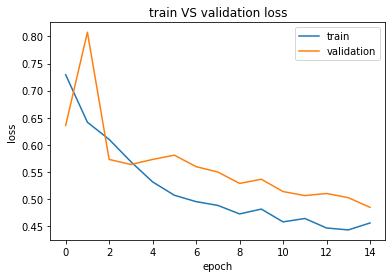

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train VS validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### 測試資料預處理及預測 ###

In [46]:
test['month'] = 11
test['year'] = 2

In [47]:
test.head()

,ID,shop_id,item_id,month,year
0,0,5,5037,11,2
1,1,5,5320,11,2
2,2,5,5233,11,2
3,3,5,5232,11,2
4,4,5,5268,11,2


In [48]:
test_2 = pd.merge(test, item.iloc[:,1:3],on = 'item_id')

In [49]:
test_2.head()

,ID,shop_id,item_id,month,year,item_category_id
0,0,5,5037,11,2,19
1,5100,4,5037,11,2,19
2,10200,6,5037,11,2,19
3,15300,3,5037,11,2,19
4,20400,2,5037,11,2,19


In [50]:
test_2.isnull().sum()

ID                  0
shop_id             0
item_id             0
month               0
year                0
item_category_id    0
dtype: int64

In [ ]:
x = []
for i in range(test_2.shape[0]):
    a = train_2['shop_id'] == test_2.iloc[i,1]
    b = train_2['item_id'] == test_2.iloc[i,2]
    c = train_2['item_category_id'] == test_2.iloc[i,3]
    y = train_2[a & b]['item_price']
    if len(y) != 0:
        x.append(y.iloc[-1])
    elif len(y) == 0:
        y = train_2[b]['item_price']
        if len(y) != 0:
            x.append(y.iloc[-1])
        else:
            x.append(train_2[c]['item_price'].mean())

In [ ]:
test_2.to_csv(r'C:\Users\user\Desktop\data\test_2.csv')

In [53]:
test_2 = pd.read_csv(r'C:\Users\user\Desktop\data\test_2.csv')

In [54]:
test_2.sort_values(['ID'], inplace = True)

In [55]:
test_2['item_price'] = std.fit_transform(test_2['item_price'].values.reshape(-1,1))

In [61]:
test_2.head()

,ID,shop_id,item_id,item_category_id,item_price,month,year
0,0,5,-0.956781,19,-0.128928,11,2
42,1,5,-0.911520,55,-0.353667,11,2
84,2,5,-0.925434,19,0.089120,11,2
126,3,5,-0.925594,23,-0.201935,11,2
168,4,5,-0.919837,20,0.861765,11,2


In [59]:
test1 = to_categorical(test_2['shop_id'])
test2 = to_categorical(test_2['item_category_id'])
test3 = to_categorical(test_2['month'],13 )
test4 = to_categorical(test_2['year'],3 )

In [60]:
test_2['item_price'] = std.fit_transform(test_2['item_price'].values.reshape(-1,1))
test_2['item_id'] = std.fit_transform(test_2['item_id'].values.reshape(-1,1))

In [63]:
test_3 = pd.concat([pd.DataFrame(test1), pd.DataFrame(test2), pd.DataFrame(test3), pd.DataFrame(test4), test_2['item_price'], test_2['item_id']], axis = 1)

In [64]:
test_4 = test_3.values.reshape(test_3.shape[0], 1, test_3.shape[1])

In [106]:
result = model.predict(test_4)

In [107]:
output = pd.concat([test.loc[:,'ID'], pd.DataFrame(result)], axis = 1)

In [108]:
output.head()

,ID,0
0,0,-0.149619
1,1,-0.116316
2,2,-0.096439
3,3,-0.111026
4,4,-0.000022


In [109]:
output = output.rename(columns = {0:'item_cnt_month'})

In [110]:
output['item_cnt_month'] = output['item_cnt_month']-min(output['item_cnt_month'])

In [111]:
output.to_csv(r'C:\Users\user\Desktop\data\output.csv', index = False)